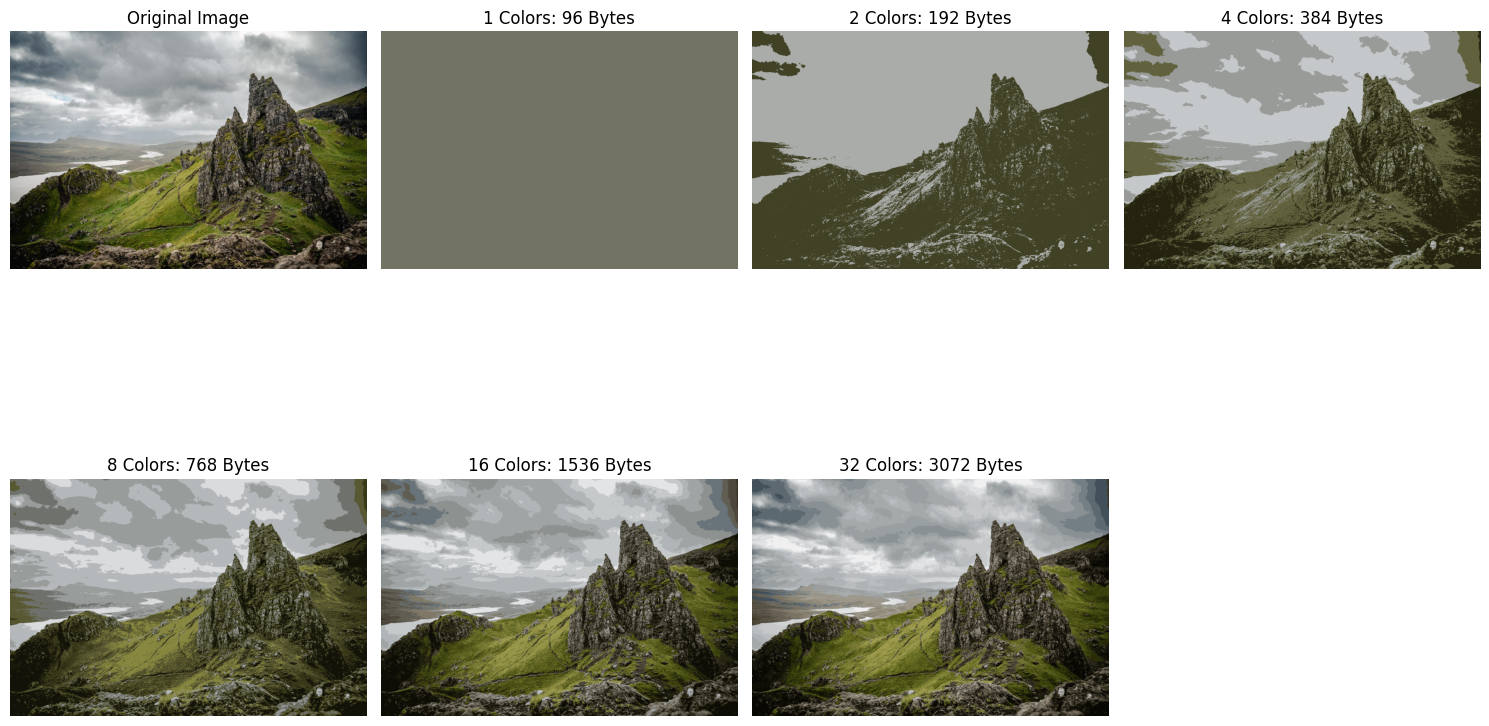

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.util import img_as_float
import pandas as pd
import sys
image_path = './Stones.jpg'
image = imread(image_path)
image = img_as_float(image)

def quantize_image(image, n_colors):
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(pixels)
    
    new_colors = kmeans.cluster_centers_[kmeans.predict(pixels)]
    
    quantized_image = new_colors.reshape(image.shape)
    return quantized_image

color_levels = [1, 2, 4, 8, 16, 32]

plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, n_colors in enumerate(color_levels, 2):
    quantized_image = quantize_image(image, n_colors)

    plt.subplot(2, 4, i)
    plt.imshow(quantized_image)
    temp=np.unique(quantized_image.reshape(-1,3))
    plt.title(f'{n_colors} Colors: {len((temp))*sys.getsizeof(temp[0])} Bytes')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [50]:
np.unique(quantized_image, axis=1)
quantized_image.shape[0]*quantized_image.shape[1]/32

34120.0

In [60]:

rnd_idx=np.random.choice(quantized_image.reshape(-1, 3).shape[0],10)
a=quantized_image.reshape(-1, 3)
a[rnd_idx]
temp=quantized_image.reshape(-1,3)
sys.getsizeof(temp[1])

112